In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from tqdm import tqdm
import json
import time
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/fall2022/cse512/project/hypoC

/content/drive/MyDrive/fall2022/cse512/project/hypoC


In [4]:
with open('structure_to_likes_to_dislikes_ratio_epoch.json', 'r') as f:
  data=json.load(f)

In [5]:
def get_rmse(y, yhat):
  return np.sqrt(np.mean((y-yhat)**2))

In [6]:
Xtrain=[]
ytrain=[]
Xtest=[]
ytest=[]
for i in range(15000):
  train_video=data[i]
  test_video=data[i+15000]
  Xtrain.append([train_video['published_at'], train_video['trending_date'], train_video['view_count'], train_video['comment_count']])
  ytrain.append(train_video['likes_to_dislikes_ratio'])

  Xtest.append([test_video['published_at'], test_video['trending_date'], train_video['view_count'], train_video['comment_count']])
  ytest.append(test_video['likes_to_dislikes_ratio'])

In [9]:
regr=ensemble.BaggingRegressor(max_samples=0.63, max_features=3/4).fit(Xtrain, ytrain)

In [10]:
pred_train=regr.predict(Xtrain)
pred_test=regr.predict(Xtest)

In [11]:
print(get_rmse(pred_train, ytrain))
print(get_rmse(pred_test, ytest))

54214.249410258875
247481.2848554282


In [13]:
train_rmse=[]
test_rmse=[]
for i in tqdm(range(0, 100, 10)):
  regr=ensemble.BaggingRegressor(n_estimators=i+10, max_samples=0.63, max_features=3/4).fit(Xtrain, ytrain)
  pred_train=regr.predict(Xtrain)
  pred_test=regr.predict(Xtest)
  
  train_rmse.append(get_rmse(pred_train, ytrain))
  test_rmse.append(get_rmse(pred_test, ytest))

100%|██████████| 10/10 [00:27<00:00,  2.76s/it]


In [19]:
print(train_rmse)

[56572.9171467988, 51546.66249666109, 49829.763540818945, 48927.191302410705, 47176.35808898984, 47931.58627586731, 49244.168250456925, 46766.99467941622, 47837.337839213404, 46236.10491093656]


In [20]:
print(test_rmse)

[247307.4343312808, 252874.5059292331, 256011.1864159633, 253915.46981856972, 254612.37405304806, 253087.37548957072, 251354.2203528595, 255109.82028212244, 251676.11474479598, 254248.1993570599]


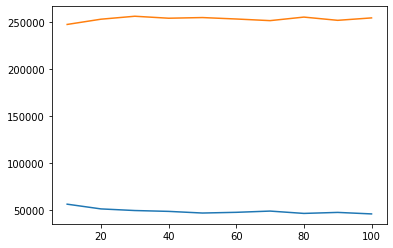

In [16]:
plt.plot(range(10, 110, 10), train_rmse)
plt.plot(range(10, 110, 10), test_rmse)

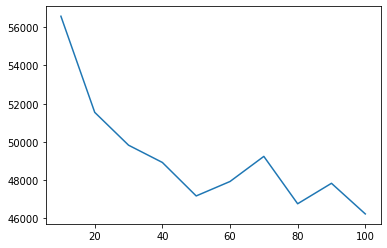

In [17]:
plt.plot(range(10, 110, 10), train_rmse)

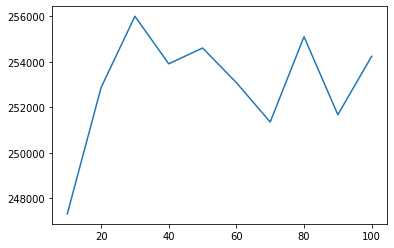

In [18]:
plt.plot(range(10, 110, 10), test_rmse)